# AI-Medic Asignment 1 - Machine Learning 
Name: Mohammad Arabzadeh  
Email: a.mohamad7824@gmail.com 


In this project, we'll analyze a dataset, containing predictors, indicating the presence or absence of breast cancer.  
First we'll look at the predictor features to see if any of them are linearly separable. Then we'll try to train machine learning models to predict breast cancer presence with the selected predictor features. 

## 1. Getting the Data Ready

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

We'll save the data features matrix in *data*, target vector in *target*, and data headers in *cancer_head*. 

In [2]:
## importing the csv file 
filename = 'dataR2.csv' # location of the dataset file
cancer_head = np.loadtxt(filename, delimiter=',', max_rows=1, dtype=str)
cancer_data = np.loadtxt(filename, delimiter=',', skiprows=1)

## randomizing the order of the data 
data = cancer_data[np.random.permutation(cancer_data.shape[0])]

## saving the data matrix and target vector 
target = data[:, 9]
data = data[:, :9]

Printing *cancer_head*, we see the data features for this dataset. the last column is the target. 

In [3]:
print(cancer_head)

['Age' 'BMI' 'Glucose' 'Insulin' 'HOMA' 'Leptin' 'Adiponectin' 'Resistin'
 'MCP.1' 'Classification']


We'll normalize the data using minimum and maximum of each data feature and save it in *norm_data* variable. 

In [4]:
## Normalization using min and max: 
norm_data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

print("Normalized data minimum: ", norm_data.min())
print("Normalized data maximum: ", norm_data.max())

Normalized data minimum:  0.0
Normalized data maximum:  1.0


## 2. Observing the Data 
We'll observe and analyse the data in two steps: 
1. Plotting each feature colored by its classifications, to see whether the data feature is linearly seperable by its own or not; 
2. Plotting each feature by other features colored by their classifications, to see whether the combination of two features will help the separability of the data.  

### 2-1. Plotting the Features Colored by Their Classifications 
What the colors show: 
* Red = Patient  
* Green = Healthy  

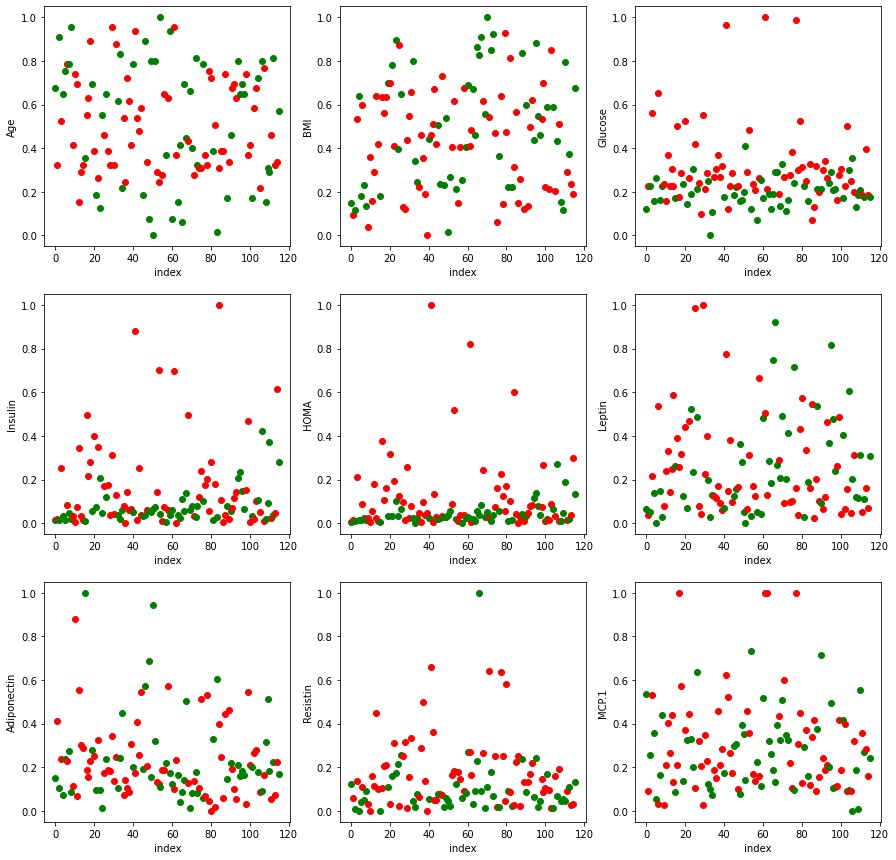

In [5]:
## plotting the features by their classifications 
fig, axs = plt.subplots(3, 3) 

for f in range(9): # f is used to determine figure position 
    for index, value in enumerate(norm_data): 
        axs[f//3, f%3].plot(index, value[f], 'gr'[int(target[index]) - 1] + 'o')
    axs[f//3, f%3].set_xlabel('index')
    axs[f//3, f%3].set_ylabel(cancer_head[f])

# make figure bigger: 
fig.set_figheight(15)
fig.set_figwidth(15)

Figures 0, 1, 5, 6, 8 do not seem to be linearly separable. we'll now take a closer look at other figures. 

In [6]:
## separating the selected features in sel_data
sel_data = norm_data[:, [2, 3, 4, 7]] # selected data features: Glucose, Insulin, HOMA, and Resistin 
sel_head = cancer_head[[2, 3, 4, 7]] # corresponding data headers for the selected features 

#### Glocuse
Above 0.4, most data is red; if we zoom in on y = [0, 0.4], we can see that the data might be separable around y = 0.25. 
#### Insulin
Above 0.2, most data is red; if we zoom in on y = [0, 0.2], we see that the data might be separable near y = 0.1. 
#### HOMA 
Above 0.2, most data is red; if we zoom in on y = [0, 0.2] and observe the plot, we can loosely say that most greens are below y = 0.05. 
#### Resistin 
Above 0.4, most data is red; if we zoom in on y = [0, 0.4], we can see that the data is almost separable in y = 0.125. 

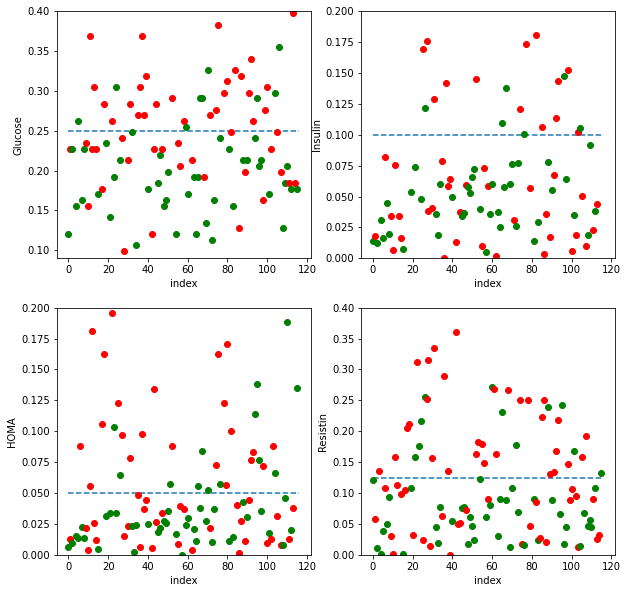

In [7]:
## plotting the selected data features by their classifications 
fig, axs = plt.subplots(2, 2) 

for f in range(4): 
    for index, value in enumerate(sel_data): 
        axs[f//2, f%2].plot(index, value[f], 'gr'[int(target[index]) - 1] + 'o')
    axs[f//2, f%2].set_xlabel('index')
    axs[f//2, f%2].set_ylabel(sel_head[f])

# make figure bigger: 
fig.set_figheight(10)
fig.set_figwidth(10)

## zoom in on each figure: 
# Glucose 
axs[0, 0].set_ylim([0.09, 0.4]) 
axs[0, 0].hlines(0.25, 0, len(sel_data), linestyles='dashed')

# Insulin 
axs[0, 1].set_ylim([0, 0.2]) 
axs[0, 1].hlines(0.1, 0, len(sel_data), linestyles='dashed')

# HOMA 
axs[1, 0].set_ylim([0, 0.2]) 
axs[1, 0].hlines(0.05, 0, len(sel_data), linestyles='dashed')

# Resistin 
axs[1, 1].set_ylim([0, 0.4]) 
axs[1, 1].hlines(0.125, 0, len(sel_data), linestyles='dashed')

### 2-2. Plotting the Features by Other Features Colored by Their Classifications

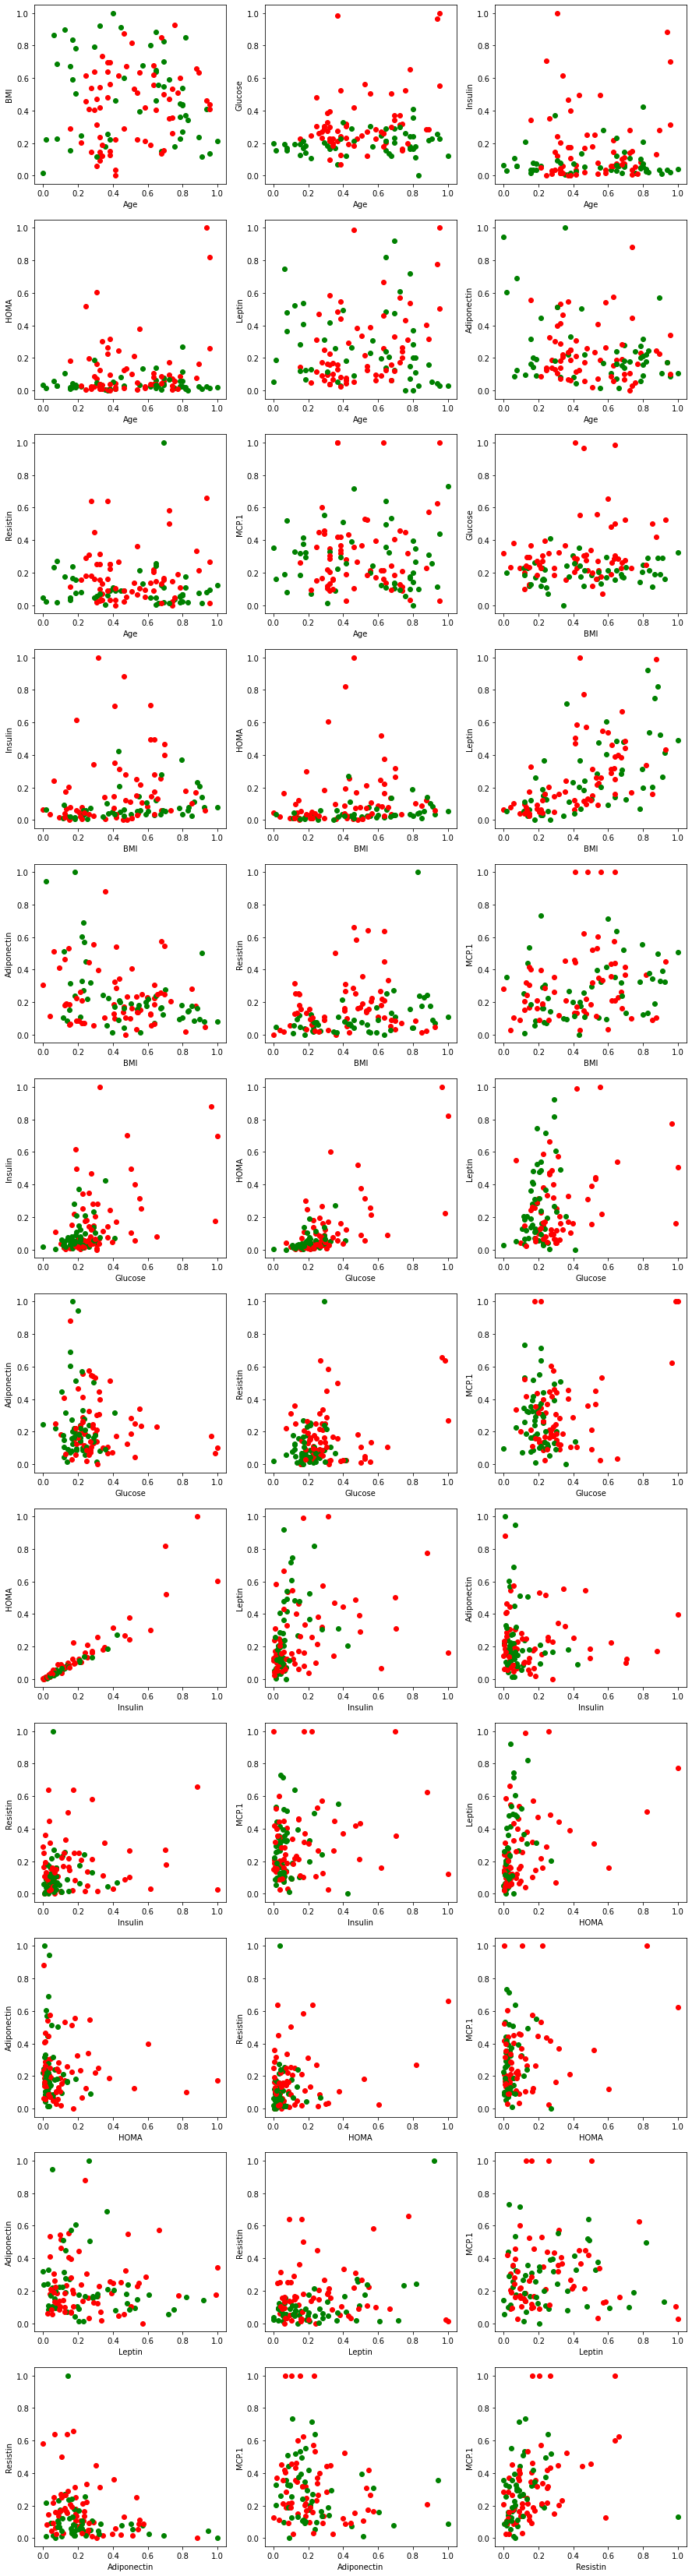

In [8]:
# plotting feature by feature colored by their classifications 
fig, axs = plt.subplots(12, 3) 
ax_inx = 0
for f1 in range(9): 
    for f2 in range(f1+1, 9): 
        for index, value in enumerate(norm_data): 
            axs[ax_inx//3, ax_inx%3].plot(value[f1], value[f2], 'gr'[int(target[index]) - 1] + 'o')
        axs[ax_inx//3, ax_inx%3].set_xlabel(cancer_head[f1])
        axs[ax_inx//3, ax_inx%3].set_ylabel(cancer_head[f2])
        ax_inx += 1 

# make figure bigger: 
fig.set_figheight(60)
fig.set_figwidth(15)

Now, we'll have a closer look at some of the plots that might be more likely to be linearly separated. 

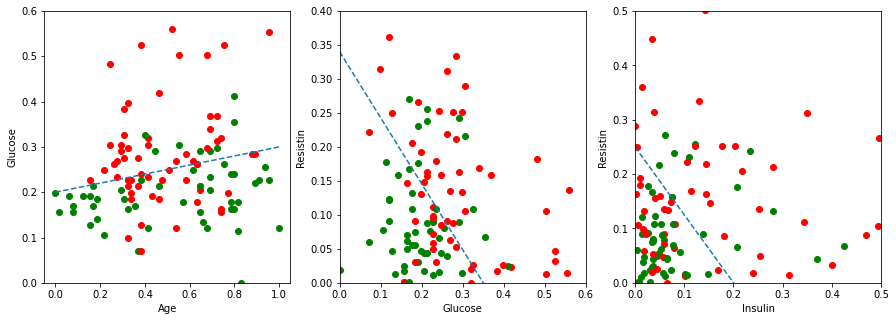

In [9]:
## plotting the selected data features by their classifications 
x = np.linspace(0, 1, 2) # x parameter for the separation lines 

fig, axs = plt.subplots(1, 3) 

for index, value in enumerate(norm_data): 
    axs[0].plot(norm_data[index, 0], norm_data[index, 2], 'gr'[int(target[index]) - 1] + 'o')
    axs[1].plot(norm_data[index, 2], norm_data[index, 7], 'gr'[int(target[index]) - 1] + 'o')
    axs[2].plot(norm_data[index, 3], norm_data[index, 7], 'gr'[int(target[index]) - 1] + 'o')

# make figure bigger: 
fig.set_figheight(5)
fig.set_figwidth(15)    

## zoom in on each figure: 
axs[0].set_xlabel(cancer_head[0])
axs[0].set_ylabel(cancer_head[2])
axs[0].set_ylim([0, 0.6]) 
axs[0].plot(x, 0.1*x + 0.2, '--')

axs[1].set_xlabel(cancer_head[2])
axs[1].set_ylabel(cancer_head[7])
axs[1].set_ylim([0, 0.4]) 
axs[1].set_xlim([0, 0.6]) 
axs[1].plot(x, -(.34/.35)*x + 0.34, '--')

axs[2].set_xlabel(cancer_head[3])
axs[2].set_ylabel(cancer_head[7])
axs[2].set_ylim([0, 0.5]) 
axs[2].set_xlim([0, 0.5]) 
axs[2].plot(x, -(.25/.2)*x + 0.25, '--')

## 3. Training the Data 
Now we'll use the following machine learning algorithms to train the data: 
1. Logistic Regression 
2. SVM with linear kernel 
3. SVM with rbf kernel 
4. Decision Tree 
5. KNN 

We'll also be using k-fold cross validation with k=5 for the models. 

In [10]:
from sklearn.model_selection import KFold 
from itertools import combinations # to train the data for all possible feature combinations 
from IPython.display import clear_output # to clear the output when needed
## model libraries
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

For each model, we'll train the model with all possible combinations of features to find the best possible results. Because the number of data samples are not too many, this method won't need too much computation. 

### 3-1. Logistic Regression

In [11]:
## initializations 
kf = KFold(n_splits=5, shuffle=True) # object for k-fold 

# average accuracy list for each combination of features: 
log_reg_acc_avg = [[], []] # index 0 for train, index 1 for test 

# index of features in cancer_head for each combination of features: 
feat_idx = [] 

log_reg_model = [[]] * 9 # save all models to average their accuracy in the end


## training 
y = target.copy() # target values vector 
print("Loading", end='') # to show progress when the model is getting trained

# this for loop indicates the number of features to train the model on:
for j in range(1, 9):
    print("...", end='') # to show progress when the model is getting trained
    
    # this for loop finds the combinations of features:
    for pos in combinations(list(range(9)), j): 
        X = norm_data[:, list(pos)].copy() # training vectors matrix 
        feat_idx.append(list(pos)) # save the current feature indices
        
        log_reg_train_acc = np.zeros(5) # save train accuracies for each fold to average later
        log_reg_test_acc = np.zeros(5) # save test accuracies for each fold to average later
        
        model_idx = 0 # the index of the model that is being trained
        
        for train_idx, test_idx in kf.split(X): 
            # add a new model: 
            log_reg_model[j-1].append(LogisticRegression()) 
            
            # fit the model: 
            log_reg_model[j-1][model_idx].fit(X[train_idx], y[train_idx])
            
            # get the accuracies saved: 
            log_reg_train_acc[model_idx] = log_reg_model[j-1][model_idx].score(X[train_idx], y[train_idx]) 
            log_reg_test_acc[model_idx] = log_reg_model[j-1][model_idx].score(X[test_idx], y[test_idx])
            
            model_idx += 1
        # average the accuracies: 
        log_reg_acc_avg[0].append(log_reg_train_acc.mean())
        log_reg_acc_avg[1].append(log_reg_test_acc.mean())


## printing out the results: 
max_tr = max(log_reg_acc_avg[0])
max_te = max(log_reg_acc_avg[1])
ind_tr = log_reg_acc_avg[0].index(max_tr)
ind_te = log_reg_acc_avg[1].index(max_te)

clear_output(wait=True)
print("Features for best training result: ", cancer_head[feat_idx[ind_tr]])
print("Training Accuracy = ", "{:.2f}".format(max_tr))
print("Testing  Accuracy = ", "{:.2f}".format(log_reg_acc_avg[1][ind_tr]), "\n") 

print("Features for best testing result: ", cancer_head[feat_idx[ind_te]])
print("Training Accuracy = ", "{:.2f}".format((log_reg_acc_avg[0][ind_te])))
print("Testing  Accuracy = ", "{:.2f}".format(max_te))

Features for best training result:  ['BMI' 'Glucose' 'HOMA' 'Leptin' 'Resistin']
Training Accuracy =  0.74
Testing  Accuracy =  0.71 

Features for best testing result:  ['Age' 'BMI' 'Glucose' 'Insulin' 'HOMA' 'Resistin']
Training Accuracy =  0.72
Testing  Accuracy =  0.73


### 3-2. SVM With Linear Kernel

In [12]:
## initializations 
kf = KFold(n_splits=5, shuffle=True) # object for k-fold 

# average accuracy list for each combination of features: 
svm_lin_acc_avg = [[], []] # index 0 for train, index 1 for test 

# index of features in cancer_head for each combination of features: 
feat_idx = [] 

svm_lin_model = [[]] * 9 # save all models to average their accuracy in the end


## training 
y = target.copy() # target values vector 
print("Loading", end='') # to show progress when the model is getting trained

# this for loop indicates the number of features to train the model on:
for j in range(1, 9):
    print("...", end='') # to show progress when the model is getting trained
    
    # this for loop finds the combinations of features:
    for pos in combinations(list(range(9)), j): 
        X = norm_data[:, list(pos)].copy() # training vectors matrix 
        feat_idx.append(list(pos)) # save the current feature indices
        
        svm_lin_train_acc = np.zeros(5) # save train accuracies for each fold to average later
        svm_lin_test_acc = np.zeros(5) # save test accuracies for each fold to average later
        
        model_idx = 0 # the index of the model that is being trained
        
        for train_idx, test_idx in kf.split(X): 
            # add a new model: 
            svm_lin_model[j-1].append(SVC(kernel='linear')) 
            
            # fit the model: 
            svm_lin_model[j-1][model_idx].fit(X[train_idx], y[train_idx])
            
            # get the accuracies saved: 
            svm_lin_train_acc[model_idx] = svm_lin_model[j-1][model_idx].score(X[train_idx], y[train_idx]) 
            svm_lin_test_acc[model_idx] = svm_lin_model[j-1][model_idx].score(X[test_idx], y[test_idx])
            
            model_idx += 1
        # average the accuracies: 
        svm_lin_acc_avg[0].append(svm_lin_train_acc.mean())
        svm_lin_acc_avg[1].append(svm_lin_test_acc.mean())


## printing out the results: 
max_tr = max(svm_lin_acc_avg[0])
max_te = max(svm_lin_acc_avg[1])
ind_tr = svm_lin_acc_avg[0].index(max_tr)
ind_te = svm_lin_acc_avg[1].index(max_te)

clear_output(wait=True)
print("Features for best training result: ", cancer_head[feat_idx[ind_tr]])
print("Training Accuracy = ", "{:.2f}".format(max_tr))
print("Testing  Accuracy = ", "{:.2f}".format(svm_lin_acc_avg[1][ind_tr]), "\n") 

print("Features for best testing result: ", cancer_head[feat_idx[ind_te]])
print("Training Accuracy = ", "{:.2f}".format((svm_lin_acc_avg[0][ind_te])))
print("Testing  Accuracy = ", "{:.2f}".format(max_te))

Features for best training result:  ['Age' 'BMI' 'Glucose' 'Insulin' 'HOMA' 'Adiponectin' 'Resistin' 'MCP.1']
Training Accuracy =  0.74
Testing  Accuracy =  0.62 

Features for best testing result:  ['Age' 'BMI' 'Glucose' 'Insulin' 'HOMA' 'Adiponectin' 'Resistin']
Training Accuracy =  0.73
Testing  Accuracy =  0.72


### 3-3. SVM With RBF Kernel

In [13]:
## initializations 
kf = KFold(n_splits=5, shuffle=True) # object for k-fold 

# average accuracy list for each combination of features: 
svm_rbf_acc_avg = [[], []] # index 0 for train, index 1 for test 

# index of features in cancer_head for each combination of features: 
feat_idx = [] 

svm_rbf_model = [[]] * 9 # save all models to average their accuracy in the end


## training 
y = target.copy() # target values vector 
print("Loading", end='') # to show progress when the model is getting trained

# this for loop indicates the number of features to train the model on:
for j in range(1, 9):
    print("...", end='') # to show progress when the model is getting trained
    
    # this for loop finds the combinations of features:
    for pos in combinations(list(range(9)), j): 
        X = norm_data[:, list(pos)].copy() # training vectors matrix 
        feat_idx.append(list(pos)) # save the current feature indices
        
        svm_rbf_train_acc = np.zeros(5) # save train accuracies for each fold to average later
        svm_rbf_test_acc = np.zeros(5) # save test accuracies for each fold to average later
        
        model_idx = 0 # the index of the model that is being trained
        
        for train_idx, test_idx in kf.split(X): 
            # add a new model: 
            svm_rbf_model[j-1].append(SVC(kernel='rbf')) 
            
            # fit the model: 
            svm_rbf_model[j-1][model_idx].fit(X[train_idx], y[train_idx])
            
            # get the accuracies saved: 
            svm_rbf_train_acc[model_idx] = svm_rbf_model[j-1][model_idx].score(X[train_idx], y[train_idx]) 
            svm_rbf_test_acc[model_idx] = svm_rbf_model[j-1][model_idx].score(X[test_idx], y[test_idx])
            
            model_idx += 1
        # average the accuracies: 
        svm_rbf_acc_avg[0].append(svm_rbf_train_acc.mean())
        svm_rbf_acc_avg[1].append(svm_rbf_test_acc.mean())


## printing out the results: 
max_tr = max(svm_rbf_acc_avg[0])
max_te = max(svm_rbf_acc_avg[1])
ind_tr = svm_rbf_acc_avg[0].index(max_tr)
ind_te = svm_rbf_acc_avg[1].index(max_te)

clear_output(wait=True)
print("Features for best training result: ", cancer_head[feat_idx[ind_tr]])
print("Training Accuracy = ", "{:.2f}".format(max_tr))
print("Testing  Accuracy = ", "{:.2f}".format(svm_rbf_acc_avg[1][ind_tr]), "\n") 

print("Features for best testing result: ", cancer_head[feat_idx[ind_te]])
print("Training Accuracy = ", "{:.2f}".format((svm_rbf_acc_avg[0][ind_te])))
print("Testing  Accuracy = ", "{:.2f}".format(max_te))

Features for best training result:  ['Age' 'BMI' 'Glucose' 'Adiponectin' 'Resistin' 'MCP.1']
Training Accuracy =  0.90
Testing  Accuracy =  0.76 

Features for best testing result:  ['Age' 'Glucose' 'Insulin' 'HOMA' 'Adiponectin' 'Resistin']
Training Accuracy =  0.86
Testing  Accuracy =  0.85


### 3-4. Decision Tree Classifier

In [14]:
## initializations 
kf = KFold(n_splits=5, shuffle=True) # object for k-fold 

# average accuracy list for each combination of features: 
dt_acc_avg = [[], []] # index 0 for train, index 1 for test 

# index of features in cancer_head for each combination of features: 
feat_idx = [] 

dt_model = [[]] * 9 # save all models to average their accuracy in the end


## training 
y = target.copy() # target values vector 
print("Loading", end='') # to show progress when the model is getting trained

# this for loop indicates the number of features to train the model on:
for j in range(1, 9):
    print("...", end='') # to show progress when the model is getting trained
    
    # this for loop finds the combinations of features:
    for pos in combinations(list(range(9)), j): 
        X = norm_data[:, list(pos)].copy() # training vectors matrix 
        feat_idx.append(list(pos)) # save the current feature indices
        
        dt_train_acc = np.zeros(5) # save train accuracies for each fold to average later
        dt_test_acc = np.zeros(5) # save test accuracies for each fold to average later
        
        model_idx = 0 # the index of the model that is being trained
        
        for train_idx, test_idx in kf.split(X): 
            # add a new model: 
            dt_model[j-1].append(DecisionTreeClassifier()) 
            
            # fit the model: 
            dt_model[j-1][model_idx].fit(X[train_idx], y[train_idx])
            
            # get the accuracies saved: 
            dt_train_acc[model_idx] = dt_model[j-1][model_idx].score(X[train_idx], y[train_idx]) 
            dt_test_acc[model_idx] = dt_model[j-1][model_idx].score(X[test_idx], y[test_idx])
            
            model_idx += 1
        # average the accuracies: 
        dt_acc_avg[0].append(dt_train_acc.mean())
        dt_acc_avg[1].append(dt_test_acc.mean())


## printing out the results: 
max_tr = max(dt_acc_avg[0])
max_te = max(dt_acc_avg[1])
ind_tr = dt_acc_avg[0].index(max_tr)
ind_te = dt_acc_avg[1].index(max_te)

clear_output(wait=True)
print("Features for best training result: ", cancer_head[feat_idx[ind_tr]])
print("Training Accuracy = ", "{:.2f}".format(max_tr))
print("Testing  Accuracy = ", "{:.2f}".format(dt_acc_avg[1][ind_tr]), "\n") 

print("Features for best testing result: ", cancer_head[feat_idx[ind_te]])
print("Training Accuracy = ", "{:.2f}".format((dt_acc_avg[0][ind_te])))
print("Testing  Accuracy = ", "{:.2f}".format(max_te))

Features for best training result:  ['HOMA']
Training Accuracy =  1.00
Testing  Accuracy =  0.53 

Features for best testing result:  ['BMI' 'Glucose' 'Leptin' 'Resistin' 'MCP.1']
Training Accuracy =  1.00
Testing  Accuracy =  0.77


### 3-5. K-Nearest Neighbors Classifier

In [15]:
## initializations 
kf = KFold(n_splits=5, shuffle=True) # object for k-fold 

# average accuracy list for each combination of features: 
knn_acc_avg = [[], []] # index 0 for train, index 1 for test 

# index of features in cancer_head for each combination of features: 
feat_idx = [] 

knn_model = [[]] * 9 # save all models to average their accuracy in the end


## training 
y = target.copy() # target values vector 
print("Loading", end='') # to show progress when the model is getting trained

# this for loop indicates the number of features to train the model on:
for j in range(1, 9):
    print("...", end='') # to show progress when the model is getting trained
    
    # this for loop finds the combinations of features:
    for pos in combinations(list(range(9)), j): 
        X = norm_data[:, list(pos)].copy() # training vectors matrix 
        feat_idx.append(list(pos)) # save the current feature indices
        
        knn_train_acc = np.zeros(5) # save train accuracies for each fold to average later
        knn_test_acc = np.zeros(5) # save test accuracies for each fold to average later
        
        model_idx = 0 # the index of the model that is being trained
        
        for train_idx, test_idx in kf.split(X): 
            # add a new model: 
            knn_model[j-1].append(KNeighborsClassifier(n_neighbors=3)) 
            
            # fit the model: 
            knn_model[j-1][model_idx].fit(X[train_idx], y[train_idx])
            
            # get the accuracies saved: 
            knn_train_acc[model_idx] = knn_model[j-1][model_idx].score(X[train_idx], y[train_idx]) 
            knn_test_acc[model_idx] = knn_model[j-1][model_idx].score(X[test_idx], y[test_idx])
            
            model_idx += 1
        # average the accuracies: 
        knn_acc_avg[0].append(knn_train_acc.mean())
        knn_acc_avg[1].append(knn_test_acc.mean())


## printing out the results: 
max_tr = max(knn_acc_avg[0])
max_te = max(knn_acc_avg[1])
ind_tr = knn_acc_avg[0].index(max_tr)
ind_te = knn_acc_avg[1].index(max_te)

clear_output(wait=True)
print("Features for best training result: ", cancer_head[feat_idx[ind_tr]])
print("Training Accuracy = ", "{:.2f}".format(max_tr))
print("Testing  Accuracy = ", "{:.2f}".format(knn_acc_avg[1][ind_tr]), "\n") 

print("Features for best testing result: ", cancer_head[feat_idx[ind_te]])
print("Training Accuracy = ", "{:.2f}".format((knn_acc_avg[0][ind_te])))
print("Testing  Accuracy = ", "{:.2f}".format(max_te))

Features for best training result:  ['Age' 'Glucose' 'Adiponectin' 'Resistin' 'MCP.1']
Training Accuracy =  0.90
Testing  Accuracy =  0.74 

Features for best testing result:  ['Age' 'BMI' 'Glucose' 'Resistin']
Training Accuracy =  0.88
Testing  Accuracy =  0.80


## 4. Conclusion
Based on results from the last section, it seems that for this dataset, SVM with rbf kernel and KNN with n=5 give us the best predictions with testing accuracies of over 80%.  
Also based on these results, it seems that Glucose, Resistin, Age, BMI, Insulin, and HOMA are the best predicting features for breast cancer. We saw before in [Observing the Data](#2.-Observing-the-Data) that these features seemed to be more linearly separable than others. 